# FB Prophet

<a href="https://medium.com/swlh/facebook-prophet-426421f7e331">Ссылка</a> на статью на Medium

## Baseline (default values)

Решение с дефолтными настройками модели:

<img src="images/3.jpeg"></img>

### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from fbprophet import Prophet

### Configuration

In [20]:
class CFG:
    def __init__(
        self, 
        data_location: str = 'data/example_wp_log_peyton_manning.csv',
        prediction_period: int = 365,
                ):
        self.data_location = data_location
        self.prediction_period = prediction_period
        return

In [21]:
cfg = CFG()

In [22]:
cfg.__dict__

{'data_location': 'data/example_wp_log_peyton_manning.csv',
 'prediction_period': 365}

### Load the data

In [9]:
df = pd.read_csv(cfg.data_location, parse_dates=[0])
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


### Train the model and predict

In [13]:
model = Prophet()
model.fit(df)

future = model.make_future_dataframe(periods=cfg.prediction_period)
forecast = model.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### Plot the results

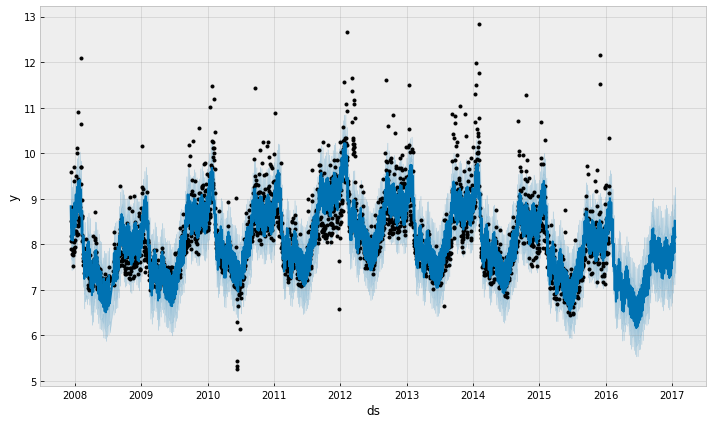

In [20]:
with plt.style.context('bmh'):
    fig = model.plot(forecast)
    plt.show()

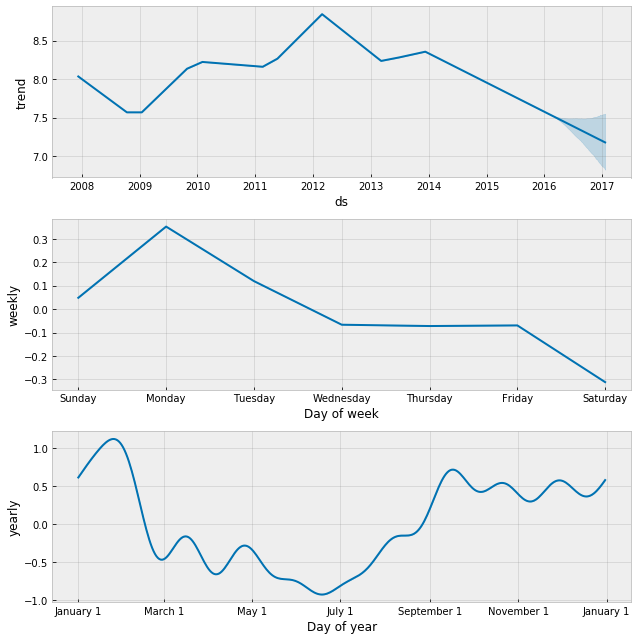

In [19]:
with plt.style.context('bmh'):
    fig = model.plot_components(forecast)
    plt.show()

In [21]:
print(forecast.shape)
display(forecast)

(3270, 19)


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2007-12-10,8.033860,8.206590,9.480595,8.033860,8.033860,0.803013,0.803013,0.803013,0.352287,0.352287,0.352287,0.450726,0.450726,0.450726,0.0,0.0,0.0,8.836873
1,2007-12-11,8.032337,7.927334,9.160606,8.032337,8.032337,0.553122,0.553122,0.553122,0.119624,0.119624,0.119624,0.433498,0.433498,0.433498,0.0,0.0,0.0,8.585459
2,2007-12-12,8.030814,7.773732,8.980477,8.030814,8.030814,0.350558,0.350558,0.350558,-0.066647,-0.066647,-0.066647,0.417205,0.417205,0.417205,0.0,0.0,0.0,8.381372
3,2007-12-13,8.029291,7.681600,8.976927,8.029291,8.029291,0.330008,0.330008,0.330008,-0.072284,-0.072284,-0.072284,0.402292,0.402292,0.402292,0.0,0.0,0.0,8.359298
4,2007-12-14,8.027767,7.701780,8.978219,8.027767,8.027767,0.319598,0.319598,0.319598,-0.069566,-0.069566,-0.069566,0.389164,0.389164,0.389164,0.0,0.0,0.0,8.347365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3265,2017-01-15,7.180847,7.483575,8.929503,6.838041,7.542546,1.018428,1.018428,1.018428,0.048295,0.048295,0.048295,0.970133,0.970133,0.970133,0.0,0.0,0.0,8.199274
3266,2017-01-16,7.179809,7.760774,9.262869,6.834054,7.544550,1.344435,1.344435,1.344435,0.352287,0.352287,0.352287,0.992148,0.992148,0.992148,0.0,0.0,0.0,8.524244
3267,2017-01-17,7.178771,7.618625,9.021383,6.830068,7.547406,1.132844,1.132844,1.132844,0.119624,0.119624,0.119624,1.013220,1.013220,1.013220,0.0,0.0,0.0,8.311615
3268,2017-01-18,7.177733,7.447925,8.853344,6.826081,7.548786,0.966499,0.966499,0.966499,-0.066647,-0.066647,-0.066647,1.033146,1.033146,1.033146,0.0,0.0,0.0,8.144232


## Other Prophet options

Cheat sheet с возможными опциями:

<img src="images/1.png"></img>

### Imports

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

### Configuration

In [34]:
class CFG:
    def __init__(
        self, 
        data_location: str = 'data/example_wp_log_peyton_manning.csv',
        prediction_period: int = 365 * 5,
        saturating_min: int = 7,
        saturating_max: int = 10,
        type_of_trend: str = 'logistic',
                ):
        self.data_location = data_location
        self.prediction_period = prediction_period
        
        # for logistic trend only in acc. with documentation
        self.saturating_min = saturating_min
        self.saturating_max = saturating_max
        self.type_of_trend = type_of_trend
        return

In [35]:
cfg = CFG()

In [36]:
cfg.__dict__

{'data_location': 'data/example_wp_log_peyton_manning.csv',
 'prediction_period': 1825,
 'saturating_min': 7,
 'saturating_max': 10,
 'type_of_trend': 'logistic'}

### Load the data

In [37]:
df = pd.read_csv(cfg.data_location, parse_dates=[0])

# only for type of trend == logistic:
df['cap'] = cfg.saturating_max
df['floor'] = cfg.saturating_min
df.head()

,ds,y,cap,floor
0,2007-12-10,9.590761,10,7
1,2007-12-11,8.519590,10,7
2,2007-12-12,8.183677,10,7
3,2007-12-13,8.072467,10,7
4,2007-12-14,7.893572,10,7


### Train the model and predict

In [38]:
model = Prophet(growth=cfg.type_of_trend)
model.add_country_holidays(country_name='US')
model.fit(df)

future = model.make_future_dataframe(periods=cfg.prediction_period)
future['cap'] = cfg.saturating_max
future['floor'] = cfg.saturating_min
forecast = model.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### Plot the results

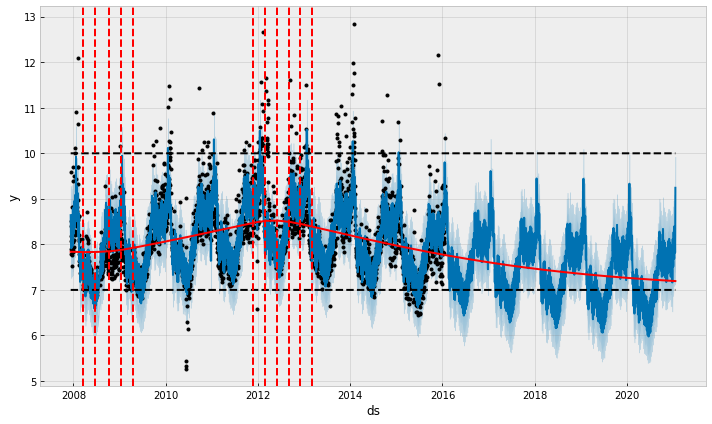

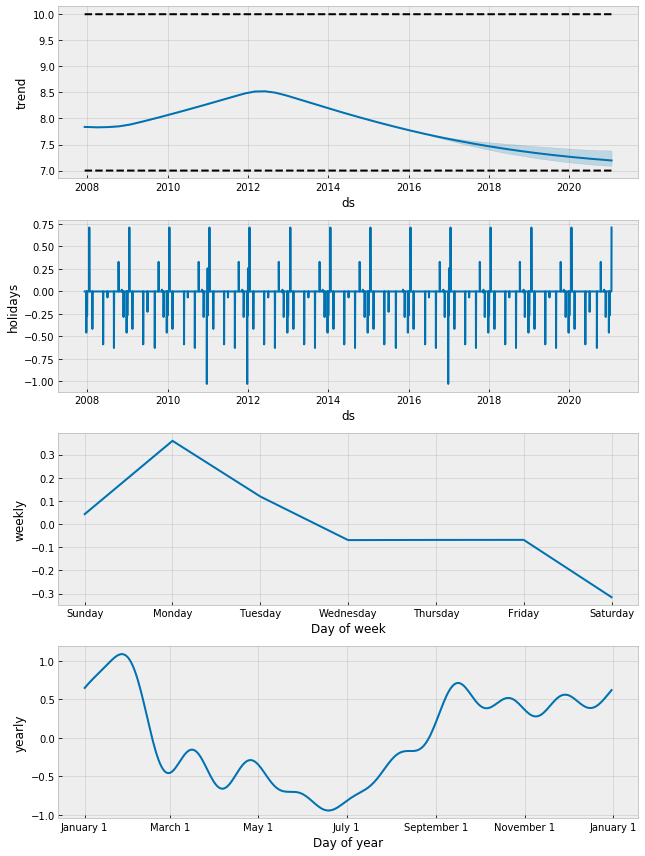

In [40]:
with plt.style.context('bmh'):
    fig_1 = model.plot(forecast)
    a = add_changepoints_to_plot(fig_1.gca(), model, forecast)
    fig_2 = model.plot_components(forecast)
    plt.show()

In [41]:
print(forecast.shape)
display(forecast)

(4730, 66)


,ds,trend,cap,floor,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2007-12-10,7.837329,10,7,7.973612,9.286241,7.837329,7.837329,0.0,0.0,...,0.359689,0.359689,0.359689,0.444642,0.444642,0.444642,0.0,0.0,0.0,8.641660
1,2007-12-11,7.837247,10,7,7.780067,9.024674,7.837247,7.837247,0.0,0.0,...,0.119168,0.119168,0.119168,0.430631,0.430631,0.430631,0.0,0.0,0.0,8.387046
2,2007-12-12,7.837164,10,7,7.498029,8.846952,7.837164,7.837164,0.0,0.0,...,-0.069219,-0.069219,-0.069219,0.418013,0.418013,0.418013,0.0,0.0,0.0,8.185958
3,2007-12-13,7.837081,10,7,7.515977,8.815889,7.837081,7.837081,0.0,0.0,...,-0.068472,-0.068472,-0.068472,0.407181,0.407181,0.407181,0.0,0.0,0.0,8.175791
4,2007-12-14,7.836999,10,7,7.448881,8.841755,7.836999,7.836999,0.0,0.0,...,-0.068233,-0.068233,-0.068233,0.398475,0.398475,0.398475,0.0,0.0,0.0,8.167241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4725,2021-01-14,7.194781,10,7,7.380195,8.733736,7.091745,7.384890,0.0,0.0,...,-0.068472,-0.068472,-0.068472,0.902104,0.902104,0.902104,0.0,0.0,0.0,8.028413
4726,2021-01-15,7.194621,10,7,7.402655,8.746989,7.091628,7.384826,0.0,0.0,...,-0.068233,-0.068233,-0.068233,0.921164,0.921164,0.921164,0.0,0.0,0.0,8.047552
4727,2021-01-16,7.194461,10,7,7.116454,8.503126,7.091512,7.384707,0.0,0.0,...,-0.315891,-0.315891,-0.315891,0.940352,0.940352,0.940352,0.0,0.0,0.0,7.818923
4728,2021-01-17,7.194302,10,7,7.515035,8.902584,7.091395,7.384557,0.0,0.0,...,0.042957,0.042957,0.042957,0.959558,0.959558,0.959558,0.0,0.0,0.0,8.196817


## Seasonal options

Поиграемся с настройками сезонности

<img src="images/2.png"></img>

### Imports

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

### Configuration

In [43]:
class CFG:
    def __init__(
        self, 
        data_location: str = 'data/example_wp_log_peyton_manning.csv',
        prediction_period: int = 365 * 5
                ):
        self.data_location = data_location
        self.prediction_period = prediction_period
        return

In [44]:
cfg = CFG()

In [45]:
cfg.__dict__

{'data_location': 'data/example_wp_log_peyton_manning.csv',
 'prediction_period': 1825}

### Load the data

In [52]:
def is_nfl_season(ds):
    month = ds.month
    return (month > 8) | (month < 2)


df = pd.read_csv(cfg.data_location, parse_dates=[0])
df['on_season'] = df['ds'].apply(is_nfl_season)
df['off_season'] = ~df['on_season']
df.head()

,ds,y,on_season,off_season
0,2007-12-10,9.590761,True,False
1,2007-12-11,8.519590,True,False
2,2007-12-12,8.183677,True,False
3,2007-12-13,8.072467,True,False
4,2007-12-14,7.893572,True,False


### Train the model and predict

In [54]:
# set user-defined seasonality and fit
model = Prophet(weekly_seasonality=False)
model.add_seasonality(name='weekly_on_season', period=7, fourier_order=3, condition_name='on_season')
model.add_seasonality(name='weekly_off_season', period=7, fourier_order=3, condition_name='off_season')
model.fit(df)

# make same columns to the future data
future = model.make_future_dataframe(periods=cfg.prediction_period)
future['on_season'] = future['ds'].apply(is_nfl_season)
future['off_season'] = ~future['on_season']

# predict future value
forecast = model.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### Plot the results

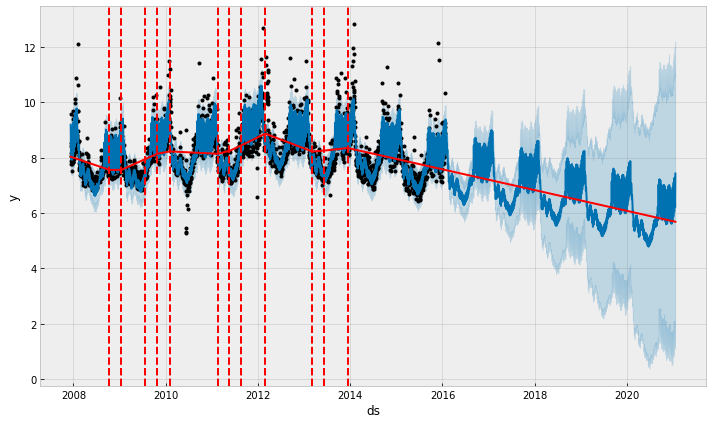

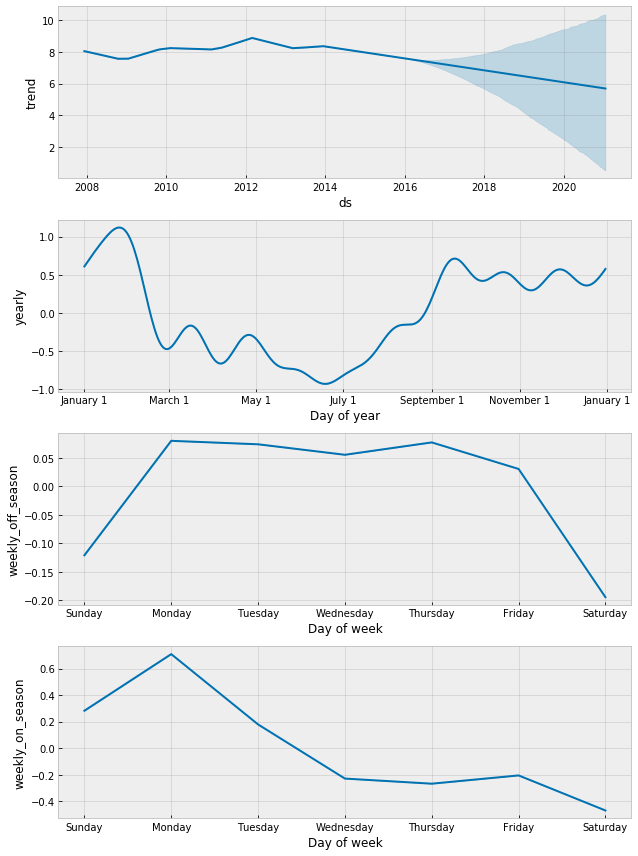

In [55]:
with plt.style.context('bmh'):
    fig_1 = model.plot(forecast)
    a = add_changepoints_to_plot(fig_1.gca(), model, forecast)
    fig_2 = model.plot_components(forecast)
    plt.show()

In [ ]:
print(forecast.shape)
display(forecast)

## Adding Regressor / Model Diagnostic

<img src="images/4.png"></img>

<img src="images/5.png"></img>

Пример испольозования Cross-валидации

### Imports

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import add_changepoints_to_plot, plot_cross_validation_metric

### Configuration

In [59]:
class CFG:
    def __init__(
        self, 
        data_location: str = 'data/example_wp_log_peyton_manning.csv',
        prediction_period: int = 365 * 5
                ):
        self.data_location = data_location
        self.prediction_period = prediction_period
        return

In [60]:
cfg = CFG()

In [61]:
cfg.__dict__

{'data_location': 'data/example_wp_log_peyton_manning.csv',
 'prediction_period': 1825}

### Load the data

In [63]:
df = pd.read_csv(cfg.data_location, parse_dates=[0])
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


### Train the model and predict

In [66]:
# fit model
model = Prophet()
model.fit(df)

# execute cross validation
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon='365 days')
pm = performance_metrics(df_cv, rolling_window=0.1)

### Plot the results

In [67]:
display(pm.head(), pm.tail())

,horizon,mse,rmse,mae,mape,coverage
0,37 days,0.494988,0.703554,0.506005,0.058644,0.679077
1,38 days,0.500795,0.707669,0.510999,0.059222,0.677935
2,39 days,0.523008,0.723193,0.517109,0.059824,0.675194
3,40 days,0.530268,0.728195,0.520003,0.060134,0.678849
4,41 days,0.537706,0.733284,0.521008,0.060214,0.686386


,horizon,mse,rmse,mae,mape,coverage
324,361 days,1.119769,1.058191,0.857411,0.102797,0.499543
325,362 days,1.135062,1.065393,0.863925,0.103386,0.501142
326,363 days,1.156276,1.075303,0.871324,0.104138,0.497031
327,364 days,1.172679,1.082903,0.878863,0.105058,0.491320
328,365 days,1.185240,1.088687,0.887712,0.106083,0.483783


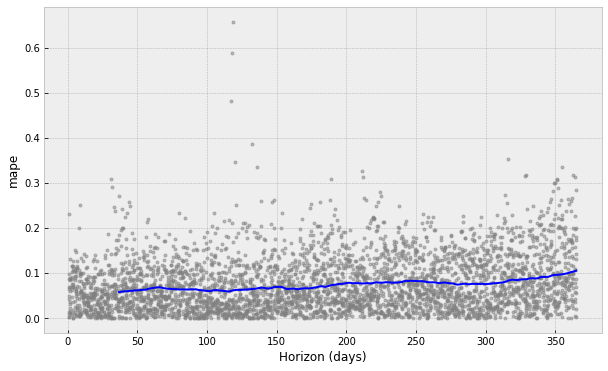

In [69]:
with plt.style.context('bmh'):
    fig = plot_cross_validation_metric(df_cv, metric='mape', rolling_window=0.1)
    plt.show()